# Titanic Survival Predictions

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [177]:
df = pd.read_csv(r"C:\Users\dell\Desktop\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [178]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [180]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [183]:
df['Sex'] = df['Sex']. map({'male' : 0,'female' : 1})
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

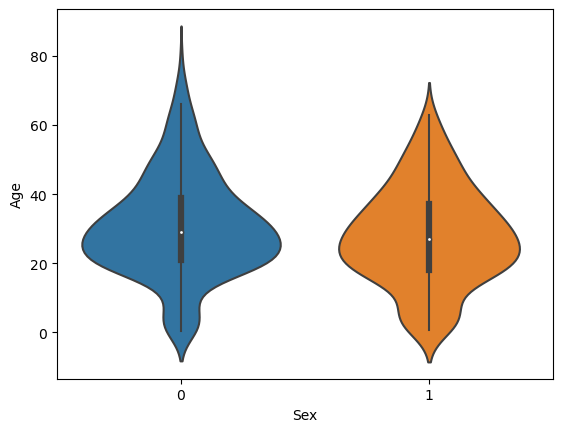

In [186]:
sns.violinplot('Sex','Age',data = df)

In [187]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [188]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [189]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [191]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [192]:
df['Embarked'].unique()

array([2, 0, 1, 3])

In [193]:
df.drop(df.index[(df["Embarked"] == 3)],axis=0,inplace=True)

In [194]:
df['Embarked'].unique()

array([2, 0, 1])

In [195]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

[]

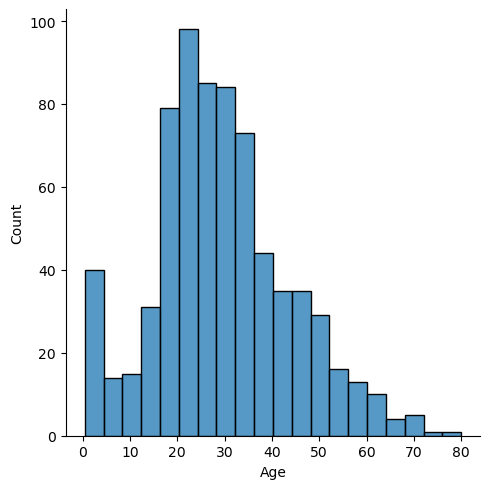

In [196]:
sns.displot(x='Age',data=df)
plt.plot()

In [197]:
np.mean(df['Age'])

29.64209269662921

In [198]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [199]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 119.1+ KB


In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [202]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [203]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 91.3 KB


In [205]:
df.astype(float)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,22.000000,1.0,0.0,7.2500,2.0
1,1.0,1.0,1.0,38.000000,1.0,0.0,71.2833,0.0
2,1.0,3.0,1.0,26.000000,0.0,0.0,7.9250,2.0
3,1.0,1.0,1.0,35.000000,1.0,0.0,53.1000,2.0
4,0.0,3.0,0.0,35.000000,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.000000,0.0,0.0,13.0000,2.0
887,1.0,1.0,1.0,19.000000,0.0,0.0,30.0000,2.0
888,0.0,3.0,1.0,29.642093,1.0,2.0,23.4500,2.0
889,1.0,1.0,0.0,26.000000,0.0,0.0,30.0000,0.0


In [206]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


[]

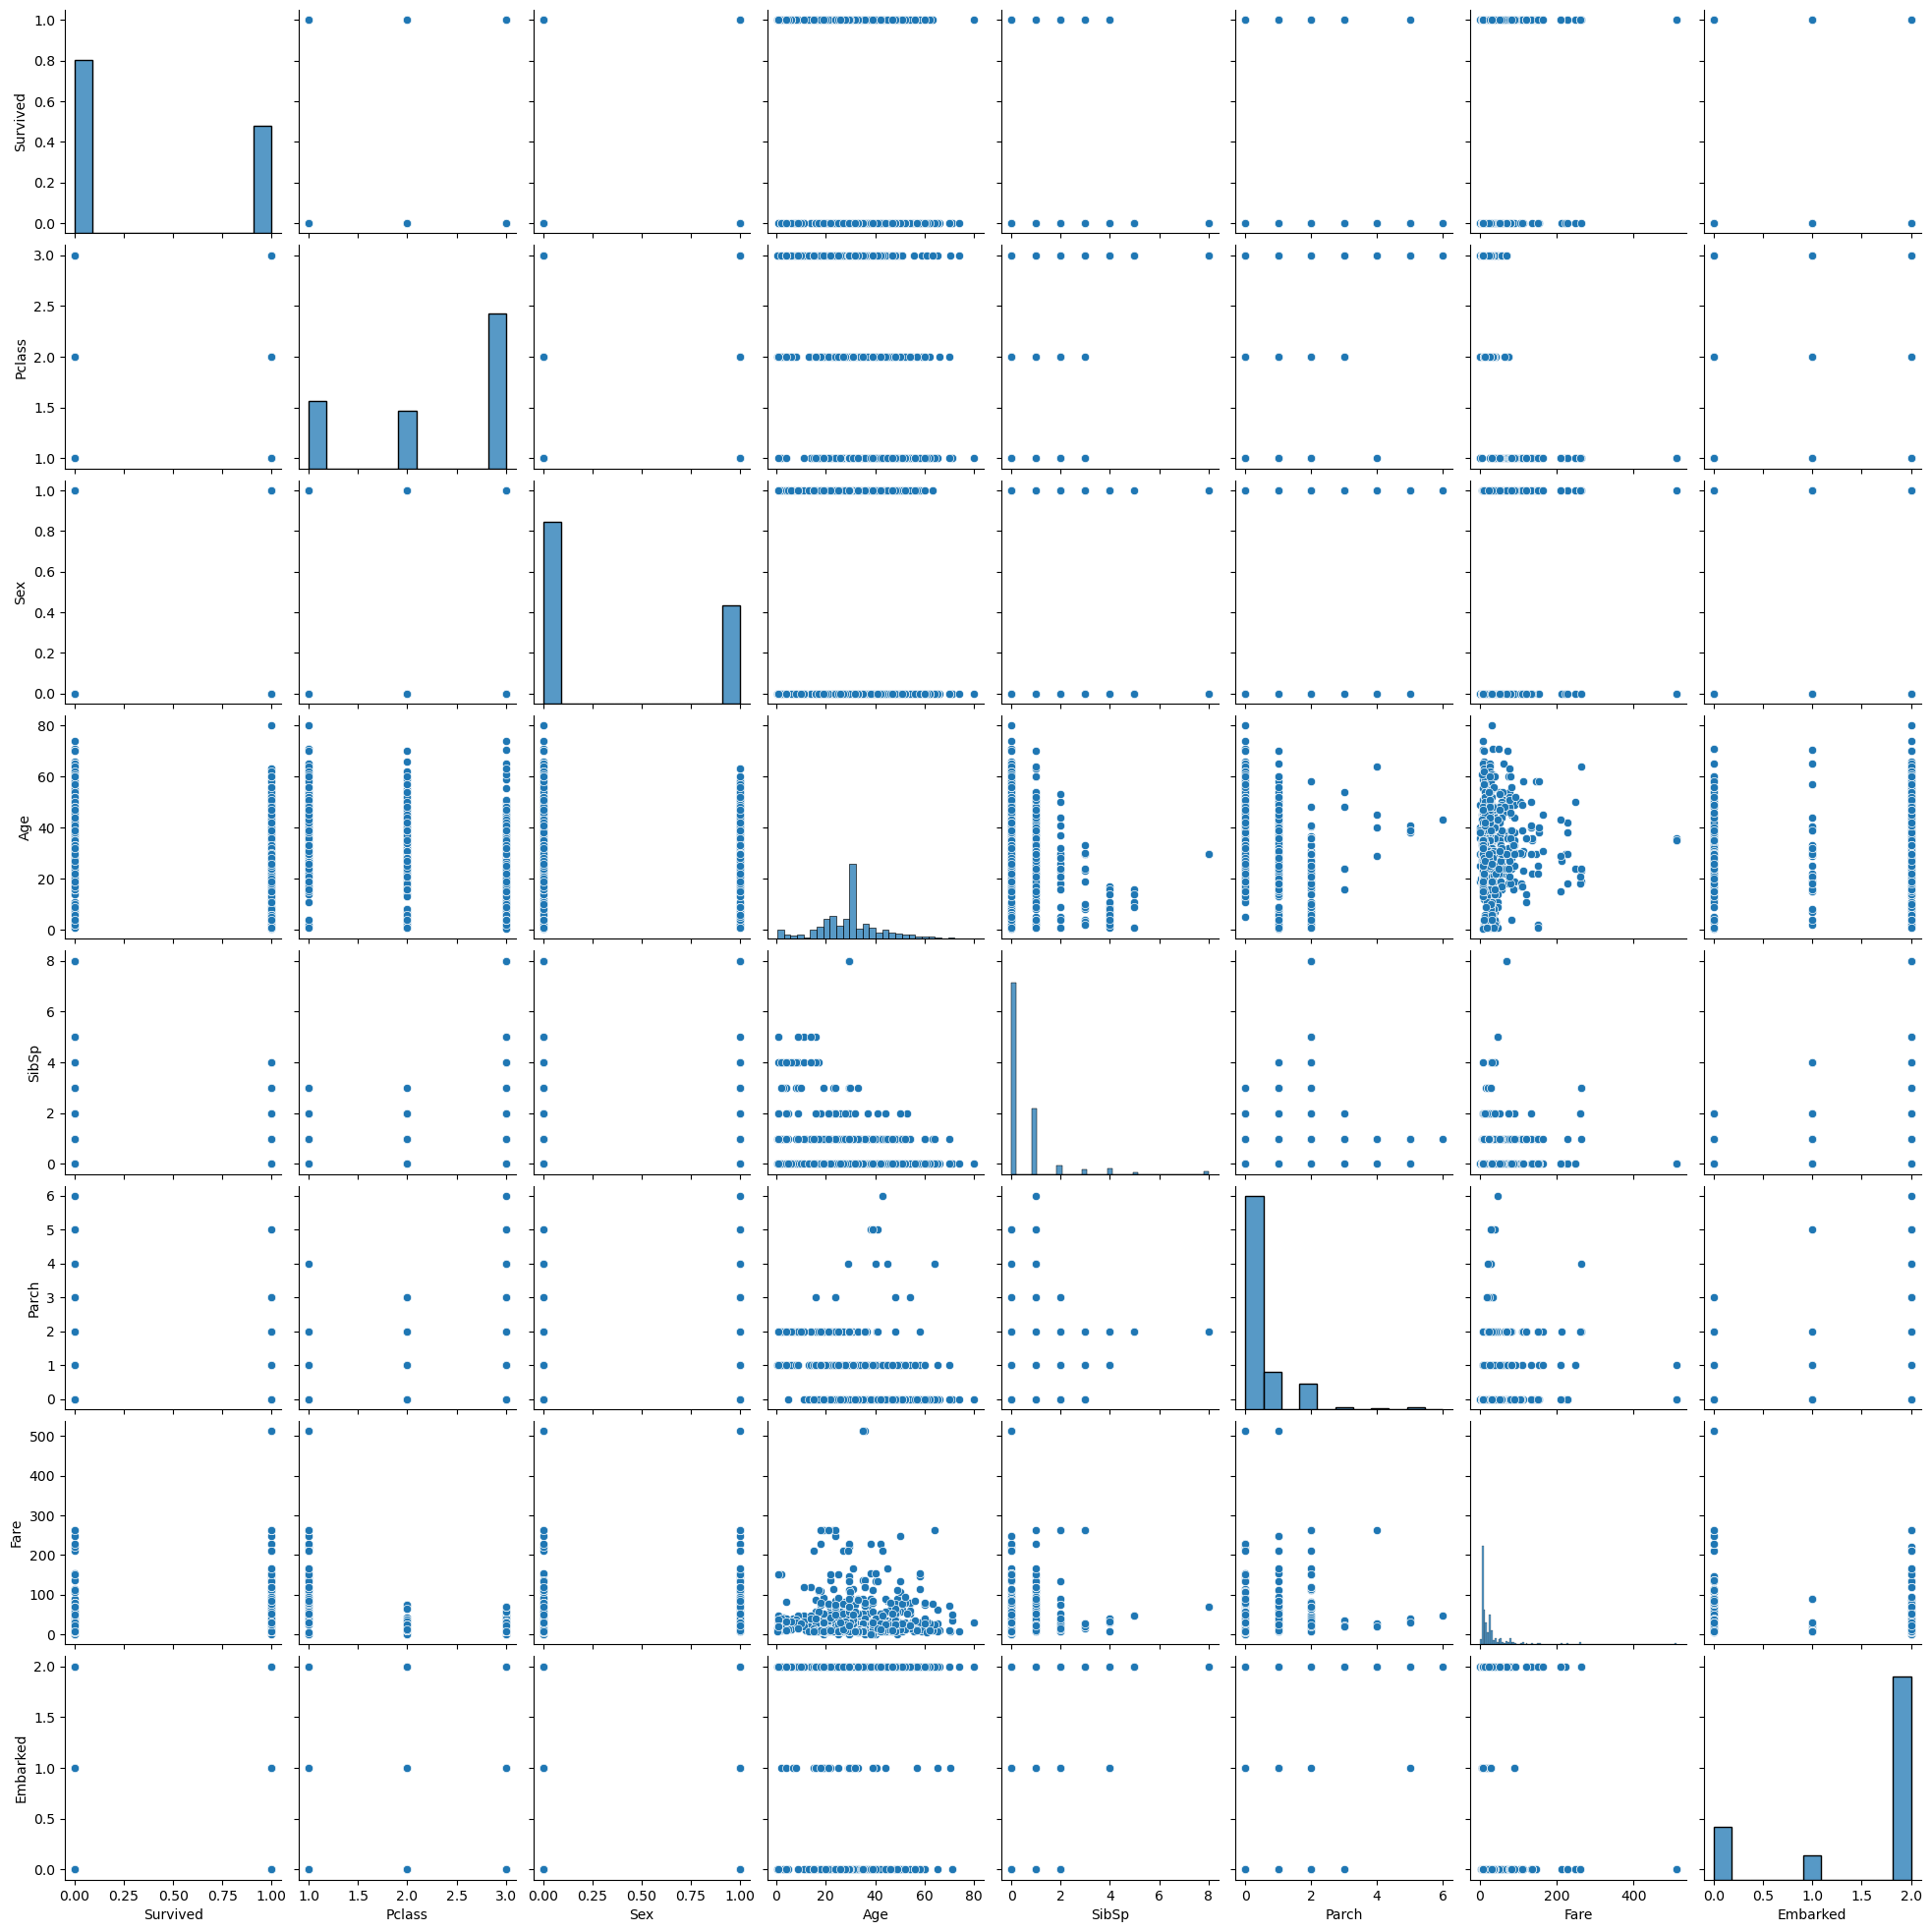

In [207]:
sns.pairplot(data = df)
plt.plot()

In [208]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [209]:
df = df.drop('Survived',axis = 1)

In [210]:
x = df
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,2
1,1,1,38.000000,1,0,71.2833,0
2,3,1,26.000000,0,0,7.9250,2
3,1,1,35.000000,1,0,53.1000,2
4,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,2
887,1,1,19.000000,0,0,30.0000,2
888,3,1,29.642093,1,2,23.4500,2
889,1,0,26.000000,0,0,30.0000,0


In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 )

In [212]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
75,3,0,25.000000,0,0,7.6500,2
836,3,0,21.000000,0,0,8.6625,2
850,3,0,4.000000,4,2,31.2750,2
661,3,0,40.000000,0,0,7.2250,0
592,3,0,47.000000,0,0,7.2500,2
...,...,...,...,...,...,...,...
364,3,0,29.642093,1,0,15.5000,1
88,1,1,23.000000,3,2,263.0000,2
595,3,0,36.000000,1,1,24.1500,2
399,2,1,28.000000,0,0,12.6500,2


In [213]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
855,3,1,18.000000,0,1,9.3500,2
114,3,1,17.000000,0,0,14.4583,0
695,2,0,52.000000,0,0,13.5000,2
655,2,0,24.000000,2,0,73.5000,2
564,3,1,29.642093,0,0,8.0500,2
...,...,...,...,...,...,...,...
513,1,1,54.000000,1,0,59.4000,0
55,1,0,29.642093,0,0,35.5000,2
627,1,1,21.000000,0,0,77.9583,2
886,2,0,27.000000,0,0,13.0000,2


In [214]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [215]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [216]:
x_train

array([[ 0.82492776, -0.73413966, -0.36617777, ..., -0.47017281,
        -0.48940823,  0.60269934],
       [ 0.82492776, -0.73413966, -0.68292074, ..., -0.47017281,
        -0.46900199,  0.60269934],
       [ 0.82492776, -0.73413966, -2.02907832, ...,  1.97885917,
        -0.0132628 ,  0.60269934],
       ...,
       [ 0.82492776, -0.73413966,  0.50486537, ...,  0.75434318,
        -0.15686221,  0.60269934],
       [-0.38439933,  1.36213864, -0.12862055, ..., -0.47017281,
        -0.38863671,  0.60269934],
       [ 0.82492776,  1.36213864,  0.18812241, ...,  0.75434318,
        -0.33119694, -0.64662786]])

In [217]:
x_test

array([[ 0.82492776,  1.36213864, -0.92047796, ...,  0.75434318,
        -0.45514591,  0.60269934],
       [ 0.82492776,  1.36213864, -0.9996637 , ..., -0.47017281,
        -0.35219168, -1.89595506],
       [-0.38439933, -0.73413966,  1.77183721, ..., -0.47017281,
        -0.37150555,  0.60269934],
       ...,
       [-1.59372642,  1.36213864, -0.68292074, ..., -0.47017281,
         0.92760661,  0.60269934],
       [-0.38439933, -0.73413966, -0.20780629, ..., -0.47017281,
        -0.3815827 ,  0.60269934],
       [-1.59372642,  1.36213864,  1.53427999, ..., -0.47017281,
        -0.12100368,  0.60269934]])

In [218]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 180,min_samples_leaf = 3,max_features = 0.5)

In [219]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=0.5, min_samples_leaf=3, n_estimators=180)

In [220]:
model.score(x_test,y_test)

0.8089887640449438

In [221]:
model.score(x_train,y_train)

0.90014064697609

In [222]:
pred = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       102
           1       0.86      0.66      0.75        76

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.80       178



In [223]:
from sklearn.metrics import confusion_matrix;
cm = confusion_matrix(y_test,pred)

<AxesSubplot:>

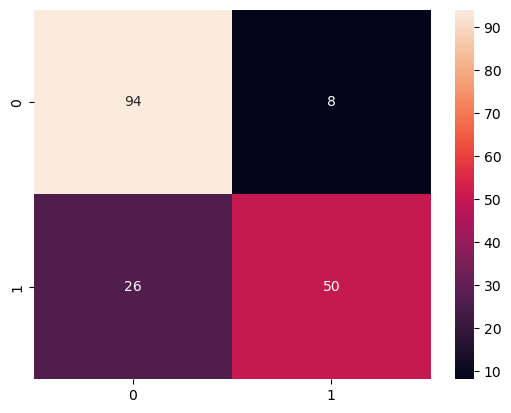

In [224]:
sns.heatmap(cm,annot = True)

In [228]:
import pickle
with open ("Titanic Survival Predictions",'wb') as f:
    pickle.dump(model,f)